In [ ]:
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.linalg import eigh
import torch
import numpy as np
import random

# Question 4

## Centroid of Sphere

In [ ]:
#convert between xyz coords and spherical coords
def coord_to_spherical(x, y, z):
    assert np.all(np.abs((x*x +y*y +z*z) - 1) < 1e-5)
    lat = np.arcsin(z)
    lon = np.arctan2(y, x)
    return np.array([lat, lon])

In [ ]:
#calculate the great circle distance
def spherical_geodist(lat1, lon1, lat2, lon2):
    return  torch.arccos(torch.sin(lat1) * torch.sin(lat2) + torch.cos(lat1) * torch.cos(lat2) * torch.cos(lon2 - lon1))

In [ ]:
#generate a 2-sphere with points only on the surface 
def generate_random_sphere(num_points):
    xy = np.random.random_sample([3, num_points]) - 0.5
    norm = np.sqrt((xy*xy).sum(axis=0))
    return xy / norm[...,:]

In [ ]:
xy_points = generate_random_sphere(200)

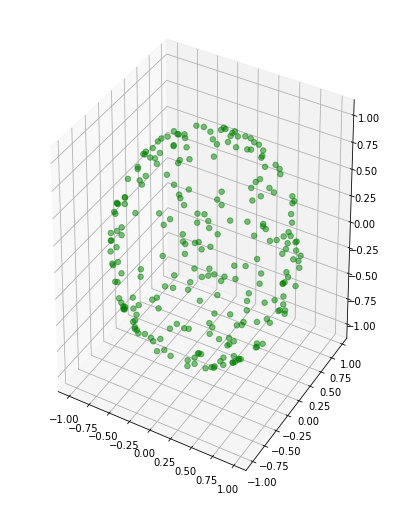

In [ ]:
fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(258, projection='3d')
ax.scatter(xy_points[0], xy_points[1], xy_points[2], s=30, c='g', alpha =0.5)

In [ ]:
def coord_to_spherical(x, y, z):
    lat = np.arcsin(z)
    lon = np.arctan2(y, x)
    return np.array([lat, lon])

In [ ]:
spherical_points = torch.tensor(coord_to_spherical(*xy_points))

In [ ]:
#perform gradient descent
def grad_descent(c, ps, lr=0.1):
    dist = spherical_geodist(*c, *ps).mean()
    dist.backward()
    with torch.no_grad():
        c -= lr * c.grad
    c.grad.zero_()
    return c, dist.item()

In [ ]:
#compute centroid
def compute_centroid(ps, eps=1e-6, max_iter=1000, lr=0.01):
    c = ps.mean(axis=1).requires_grad_()
    dist = None
    for _ in range(max_iter):
        last_dist = dist
        c, dist = grad_descent(c, ps, lr=lr)
        if last_dist and abs(dist - last_dist) < eps:
            return c.requires_grad_(False)
    raise Exception("Did not converge")

In [ ]:
xy_points = generate_random_sphere(240)
spherical_points = torch.tensor(coord_to_spherical(*xy_points))
centroid = compute_centroid(spherical_points)

In [ ]:
def spherical_to_coord(lat, lon):
    return np.array([np.cos(lat) * np.cos(lon), np.cos(lat)*np.sin(lon), np.sin(lat)])

In [ ]:
def total_distance(ps, m):
    # Allow m to be a vector *or* a matrix
    if len(m.shape) == 1:
        m = m[:, None]
    return geodist(ps, m).sum(axis=1)

In [ ]:
def geodist(x, y, eps=1e-6):
    dotprod = y.T @ x
    assert ((-1 - eps) <= dotprod).all() and (dotprod <= (1 + eps)).all()
    dotprod = dotprod.clip(-1, 1)
    return np.arccos(dotprod)

In [ ]:
def latlon_geodist(lat1, lon1, lat2, lon2):
    return  np.arccos(np.sin(lat1) * np.sin(lat2) + np.cos(lat1) * np.cos(lat2) * np.cos(lon2 - lon1))

In [ ]:
#coordinates of centroid and total distance returned
cent = spherical_to_coord(*np.array(centroid))
cent, total_distance(xy_points, cent)

(array([0.99880093, 0.04866781, 0.00530448]), array([384.6388622]))

### Example 2

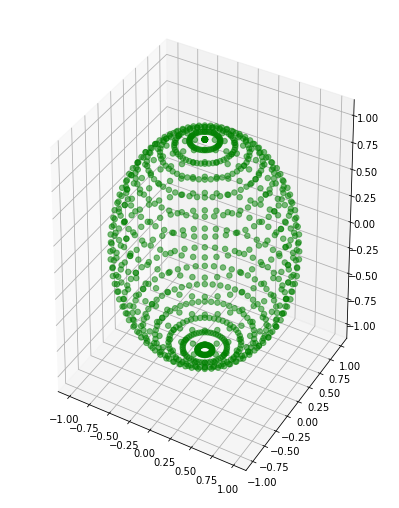

In [ ]:
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec


phi = np.linspace(0, np.pi, 25)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

xi, yi, zi = sample_spherical(250)

fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(258, projection='3d')
ax.scatter(x, y, z, s=30, c='g', alpha =0.5)

In [ ]:
x.shape

(40, 25)

In [ ]:
spherical_points = torch.tensor(coord_to_spherical(x,y,z))
centroid = compute_centroid(spherical_points)

In [ ]:
cent = spherical_to_coord(*np.array(centroid))
cent, total_distance(xy_points, cent)

In [ ]:
cent = spherical_to_coord(*np.array(centroid))

In [ ]:
z.shape

(40, 25)

In [ ]:
cent.T

array([[ 6.11826311e-17, -9.99188193e-01,  4.02859239e-02],
       [ 1.27177676e-01, -9.91061493e-01,  4.02859239e-02],
       [ 2.52286602e-01, -9.66813588e-01,  4.02859239e-02],
       [ 3.73291683e-01, -9.26838909e-01,  4.02859239e-02],
       [ 4.88224575e-01, -8.71787708e-01,  4.02859239e-02],
       [ 5.95215711e-01, -8.02555482e-01,  4.02859239e-02],
       [ 6.92524709e-01, -7.20268402e-01,  4.02859239e-02],
       [ 7.78568681e-01, -6.26265002e-01,  4.02859239e-02],
       [ 8.51947985e-01, -5.22074397e-01,  4.02859239e-02],
       [ 9.11468987e-01, -4.09391413e-01,  4.02859239e-02],
       [ 9.56163485e-01, -2.90049022e-01,  4.02859239e-02],
       [ 9.85304449e-01, -1.65988518e-01,  4.02859239e-02],
       [ 9.98417855e-01, -3.92279444e-02,  4.02859239e-02],
       [ 9.85304449e-01,  1.65988518e-01,  4.02859239e-02],
       [ 9.56163485e-01,  2.90049022e-01,  4.02859239e-02],
       [ 9.11468987e-01,  4.09391413e-01,  4.02859239e-02],
       [ 8.51947985e-01,  5.22074397e-01

### Example 3

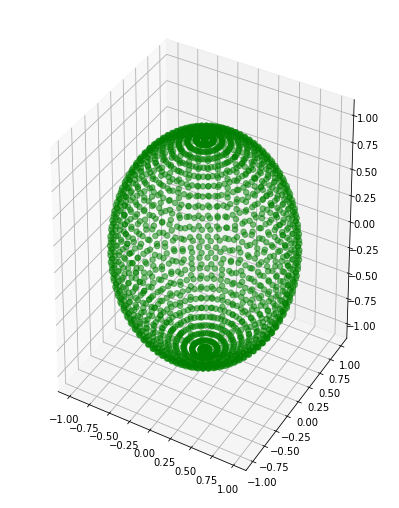

In [ ]:
phi = np.linspace(0, np.pi, 30)
theta = np.linspace(0, 2 * np.pi, 70)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

xi, yi, zi = sample_spherical(250)

fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(258, projection='3d')
ax.scatter(x, y, z, s=30, c='g', alpha =0.5)

In [ ]:
spherical_points = torch.tensor(coord_to_spherical(x,y,z))
centroid = compute_centroid(spherical_points)

In [ ]:
cent = spherical_to_coord(*np.array(centroid))

In [ ]:
cent.T

array([[-3.82757583e-16, -9.99740668e-01,  2.27727192e-02],
       [ 1.06552739e-01, -9.94046235e-01,  2.27727192e-02],
       [ 2.11891649e-01, -9.77027805e-01,  2.27727192e-02],
       [ 3.14816727e-01, -9.48879250e-01,  2.27727192e-02],
       [ 4.14155469e-01, -9.09921233e-01,  2.27727192e-02],
       [ 5.08776227e-01, -8.60597557e-01,  2.27727192e-02],
       [ 5.97601097e-01, -8.01470107e-01,  2.27727192e-02],
       [ 6.79618202e-01, -7.33212454e-01,  2.27727192e-02],
       [ 7.53893219e-01, -6.56602176e-01,  2.27727192e-02],
       [ 8.19580020e-01, -5.72512004e-01,  2.27727192e-02],
       [ 8.75930312e-01, -4.81899878e-01,  2.27727192e-02],
       [ 9.22302163e-01, -3.85798035e-01,  2.27727192e-02],
       [ 9.58167313e-01, -2.85301250e-01,  2.27727192e-02],
       [ 9.83117193e-01, -1.81554364e-01,  2.27727192e-02],
       [ 9.96867579e-01, -7.57392437e-02,  2.27727192e-02],
       [ 9.96867579e-01,  7.57392437e-02,  2.27727192e-02],
       [ 9.83117193e-01,  1.81554364e-01

## Hyperboloid Centroid

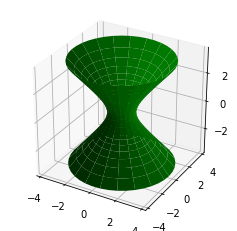

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig.add_subplot(111, projection='3d')

r=2
u=np.linspace(-2,2,25)
v=np.linspace(0,2*np.pi,40)
[u,v]=np.meshgrid(u,v)

a = 1
b = 1
c = 1

xh = a*np.cosh(u)*np.cos(v)
yh = b*np.cosh(u)*np.sin(v)
zh = c*np.sinh(u)

ax.plot_surface(xh, yh, zh,  rstride=2, cstride=1, color='g')

In [ ]:
def spherical_geodist_euclidea():
  

In [ ]:
spherical_points = torch.tensor(coord_to_spherical(xh,yh,zh))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arcsin
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
spherical_points.shape

torch.Size([2, 40, 25])

In [ ]:
spherical_geodist(*spherical_points[0], spherical_points)

In [ ]:
spherical_points = torch.tensor(coord_to_spherical(xh,yh,zh))
centroid = compute_centroid(spherical_points)

(40, 25)

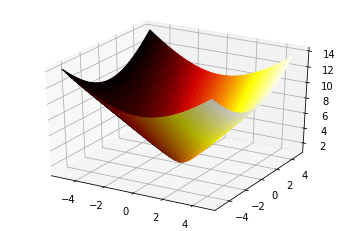

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)

Z = np.sqrt(4.*(X**2 + Y**2)/1. + 1)

xcolors = X - min(X.flat)
xcolors = xcolors/max(xcolors.flat)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.hot(xcolors),
    linewidth=1)

plt.show()

In [ ]:
X.shape

(1797, 64)

In [ ]:
xy_ps = list(zip(x, y, z))

In [ ]:
xy_ps.shape

(60, 3, 200)

# Question 5

## Experiment 1:
Given a distance matrix, I generate a random 2-sphere. Then i iteratively move the points around my random 2-sphere until loss function (distortion score) between my generated sphere and my inputted sphere is minimized.

In [ ]:
def calc_geodist(lat1, lon1, lat2, lon2):
    return  np.arccos(np.sin(lat1) * np.sin(lat2) + np.cos(lat1) * np.cos(lat2) * np.cos(lon2 - lon1))

In [ ]:
r1 = generate_random_sphere(200)

In [ ]:
r1 = torch.tensor(coord_to_spherical(*r1))

In [ ]:
r2 = generate_random_sphere(200)

In [ ]:
r2 = torch.tensor(coord_to_spherical(*r2))

In [ ]:
loss(r1,r2) #starting loss !!!

624.6672962268353

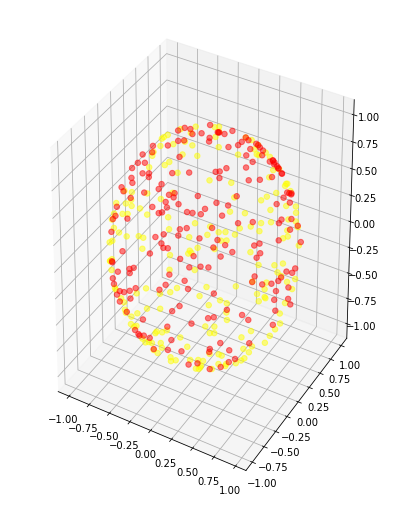

In [ ]:
fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(258, projection='3d')
ax.scatter(r1[0], r1[1], r1[2], s=30, c='red', alpha =0.5)
ax.scatter(r2[0], r2[1], r2[2], s=30, c='yellow', alpha =0.5)

In [ ]:
def loss(original, embedded):
  #takes in spherical coords
  res = (spherical_geodist(*original, *embedded))**2
  res = np.nan_to_num(res)
  res = res.sum()
  return res

In [ ]:
#compute gradient descent
def compute_grad(ps, eps=1e-6, max_iter=1000, lr=0.01): #ps = distance matrix, #
    c = ps.T[0].requires_grad_()
    dist = None
    for _ in range(max_iter):
        last_dist = dist
        c, dist = grad_descent(c, ps, lr=lr)
        if last_dist and abs(dist - last_dist) < eps:
            return c.requires_grad_(False)
    raise Exception("Did not converge")

tensor([0.0009, 0.0639], dtype=torch.float64, requires_grad=True)

In [ ]:
#perform gradient descent
def grad_descent(c, ps, lr=0.1):
    #dist = spherical_geodist(*c, *ps)**2
    #dist = np.nan_to_num(dist)
    #dist = dist.sum()

    dist = loss(ps, c)

    dist.backward()
    with torch.no_grad():
        c -= lr * c.grad
    c.grad.zero_()
    return c, dist.item()

In [ ]:
def descent_lat(dissim_X, sphere_Y):
  direction = 1
  og_sphere = sphere_Y.clone()
  eps = 1e-1

  lateps = np.array([eps, 0])[0]
  #print(lateps)
  idxx = random.sample(range(0, r.T.shape[0]), 1)
  Y = sphere_Y.T

  for idx in idxx:
    #print(Y[idx])
    Y[idx][0] = Y[idx][0] + (direction *lateps)
    #print(idx)
  #print(Y[idx])
  
  if loss(dissim_X, Y.T) < loss(dissim_X, og_sphere):
    #print(loss(dissim_X, Y.T))
    #print(loss(dissim_X, og_sphere))
    direction = 1
  else:
    #print(loss(dissim_X, Y.T))
    #print(loss(dissim_X, og_sphere))

    direction = -1
    Y[idx][0] = Y[idx][0] + (direction *lateps)
    Y[idx][0] = Y[idx][0] + (direction *lateps)

    #print(loss(dissim_X, Y.T))
    #print(loss(dissim_X, og_sphere))

    #print(Y[idx])
    #print('reversed?')

  #print(direction)
  '''
  idxx = random.sample(range(0, r.T.shape[0]), 1)

  for idx in idxx:
    Y[idx][0] = Y[idx][0] + (direction *lateps)

  #print(og_sphere == Y.T)
  '''
  return Y.T


In [ ]:
def descent_lon(dissim_X, sphere_Y):
  direction = 1
  og_sphere = sphere_Y.clone()
  eps = 1e-1

  loneps = np.array([0, eps])[1]
  #print(loneps)
  idxx = random.sample(range(0, r.T.shape[0]), 1)
  Y = sphere_Y.T

  for idx in idxx:
    #print(Y[idx])
    Y[idx][1] = Y[idx][1] + (direction *loneps)
    #print(idx)
  #print(Y[idx])
  
  if loss(dissim_X, Y.T) < loss(dissim_X, og_sphere):
    #print(loss(dissim_X, Y.T))
    #print(loss(dissim_X, og_sphere))
    direction = 1
  else:
    #print(loss(dissim_X, Y.T))
    #print(loss(dissim_X, og_sphere))

    direction = -1
    Y[idx][1] = Y[idx][1] + (direction *loneps)
    Y[idx][1] = Y[idx][1] + (direction *loneps)

    #print(loss(dissim_X, Y.T))
    #print(loss(dissim_X, og_sphere))

    #print(Y[idx])
    #print('reversed?')

  #print(direction)
  '''
  idxx = random.sample(range(0, r.T.shape[0]), 1)

  for idx in idxx:
    Y[idx][0] = Y[idx][0] + (direction *lateps)

  #print(og_sphere == Y.T)
  '''
  return Y.T

In [ ]:
def perform_grad(dissim_X, sphere_Y, eps=1e-6, max_iter=6000, lr=0.01): #ps = distance matrix, #
    dist = loss(dissim_X, sphere_Y)
    print("original loss", loss(dissim_X, sphere_Y))
    for _ in range(max_iter):
        last_dist = dist
        new_sphere = descent_lat(dissim_X, sphere_Y)
        new_sphere = descent_lon(dissim_X, sphere_Y)
        dist = loss(dissim_X, new_sphere) 

        if abs(dist - last_dist) < eps:
            print('final loss: ', loss(dissim_X, new_sphere))
            return new_sphere
    return new_sphere

In [ ]:
ww = perform_grad(r1, r2)

original loss 624.6672962268353


In [ ]:
los = loss(r1, los) #fi
los

9.572089840293108

In [ ]:
def latlon_to_coord(lat, lon):
    return np.array([np.cos(lat) * np.cos(lon), np.cos(lat)*np.sin(lon), np.sin(lat)])

In [ ]:
r1 = latlon_to_coord(*np.asarray(r1))

In [ ]:
w.shape

torch.Size([2, 200])

In [ ]:
w = latlon_to_coord(*np.asarray())

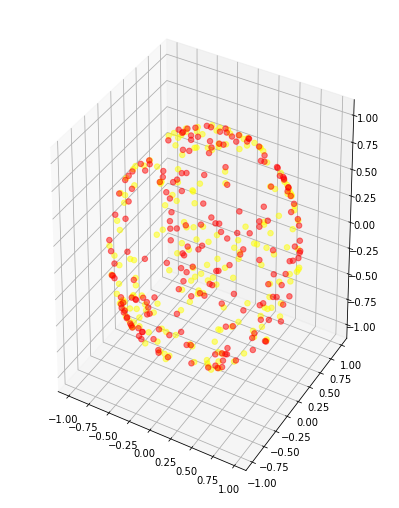

In [ ]:
fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(258, projection='3d')
ax.scatter(r1[0], r1[1], r1[2], s=30, c='red', alpha =0.5)
ax.scatter(w[0], w[1], w[2], s=30, c='yellow', alpha =0.5)
print("Final Loss: ")

## Experiment 2:
Based on this paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5965551/#app1-0013164416661823

Given coordinates, I run SMACOF version of MDS on the dissimilarity matrix to embed the points in a 3 dimensional euclidean space. Once these points have been embedded i project them onto the surface of the sphere given the conditions described in the paper.

In [ ]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
X, _ = load_digits(return_X_y=True)
X.shape

dissim_X = get_pairwise_distances(X)
dissim_X.shape

(1797, 1797)

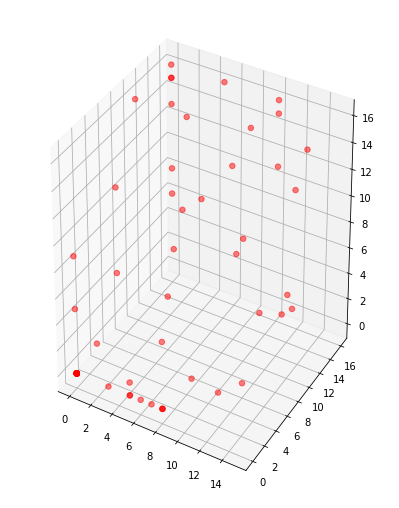

In [ ]:
fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(258, projection='3d')
ax.scatter(X[0], X[1], X[2], s=30, c='red', alpha =0.5)

In [ ]:
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(X[:100])
X_transformed.shape

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  9.,  0.,  0.],
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

In [ ]:
from sklearn.manifold import smacof

In [ ]:
embedding = smacof(dissim_X, True, 3)

In [ ]:
embed_short = embedding[0][:300]

In [ ]:
embed_short[0]

array([ -5.11543578,  24.62574192, -17.67630449])

In [ ]:
em_short.shape

(3, 720)

In [ ]:
norms = (em_short*em_short).sum(axis=0)
norms.max()

2358.536743514405

In [ ]:
play_dataset = em_short.T[:5]

In [ ]:
def rad_to_degrees(rad):
  if rad == None:
    return None
  
  return rad * (180/np.pi)


def sgn(a):
  return a/abs(a)

def quantity(a,b):
  return np.sqrt((a*a) + (b*b))

def project_onto_sphere(embedded_data):
  x = embedded_data[0]
  y = embedded_data[1]
  z = embedded_data[2]

  if x > 0 and y > 0:
    longitude = np.dot(np.arctan(abs(y/x)), sgn(y))
  
  elif x > 0 and y < 0:
    longitude = np.dot(np.arctan(abs(y/x)), sgn(y))
  
  elif x > 0 and y == 0:
    longitude = 0

  elif x == 0 and y > 0:
    longitude = np.dot((np.pi/2), sgn(y))

  elif x < 0 and y < 0:
    longitude = np.pi

  elif x == 0 and y !=0:
    longitude = np.pi - np.dot((np.arctan(abs(y/x))), sgn(y))
  
  elif x == 0 and y == 0:
    longitude = None

  elif x < 0 and y !=0:
    longitude = np.pi - np.dot((np.arctan(abs(y/x))), sgn(y))


  if quantity(x,y) != 0:
    latitude = np.dot(np.arctan(abs(z/quantity(x,y))), sgn(z))
  else:
    latitude = np.dot((np.pi/2), sgn(z))

  return rad_to_degrees(latitude), rad_to_degrees(longitude)



In [ ]:
results = []
for i in range(len(embed_short)):
  results.append(project_onto_sphere(embed_short[i]))

In [ ]:
coods = []
for i in range(len(embed_short)):
  coods.append(latlon_to_coord(results[i][1], results[i][0]))

In [ ]:
coods = np.asarray(coods).T

In [ ]:
coods.shape

(3, 300)

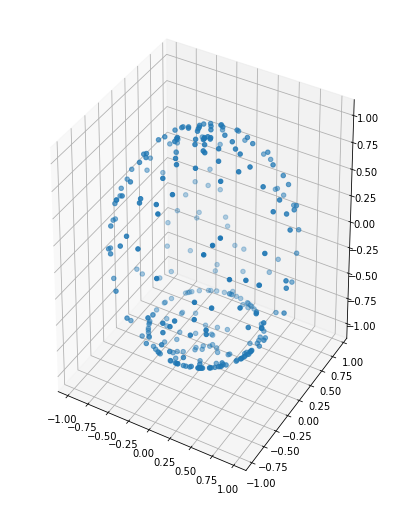

In [ ]:
fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(258, projection='3d')
ax.scatter(coods[0], coods[1], coods[2])

In [ ]:
norms = (coods*coods).sum(axis=0)
norms.max()

1.0000000000000002

In [ ]:
#We see that it recovers a sphere but there is a slight bias to the bottom of it with coordinates that do not have a projection